In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

#tips 데이터셋 불러오기
tips = sns.load_dataset("tips")
print(tips.head())
tips.to_csv("./tips.csv", index=False)

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


<Axes: xlabel='day', ylabel='Count'>

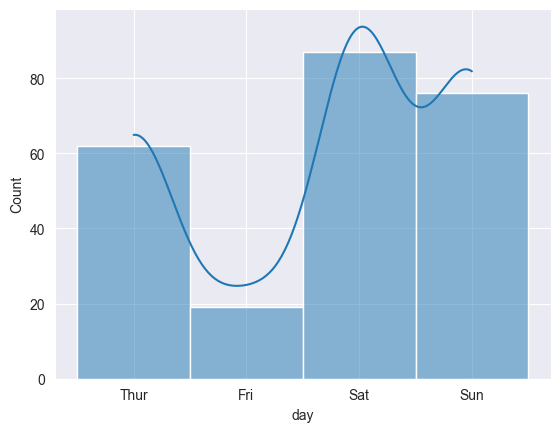

In [3]:
# 예제1-1
# 요일별 팁 분포를 시각화
sns.histplot(tips, x="day", bins=6, kde=True)

   total_bill   tip  size
0       16.99  1.01     2
1       10.34  1.66     3
2       21.01  3.50     3
3       23.68  3.31     2
4       24.59  3.61     4
            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


<Axes: >

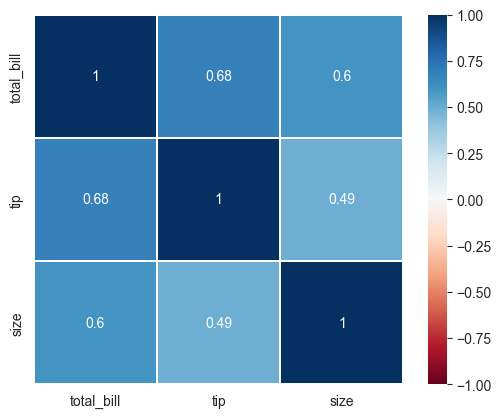

In [5]:
# 예제1-2
# 숫자형 변수 간 상관관계 히트맵 그리기
heatmap_data = tips[["total_bill", "tip", "size"]]
print(heatmap_data.head())

result = heatmap_data.corr()
print(result)

colormap = plt.cm.RdBu
sns.heatmap(result, linewidths=0.1, vmax= 1.0 , vmin=-1.0, square=True, cmap = colormap, linecolor="white", annot = True, annot_kws={"size": 10})

<Axes: xlabel='total_bill', ylabel='tip'>

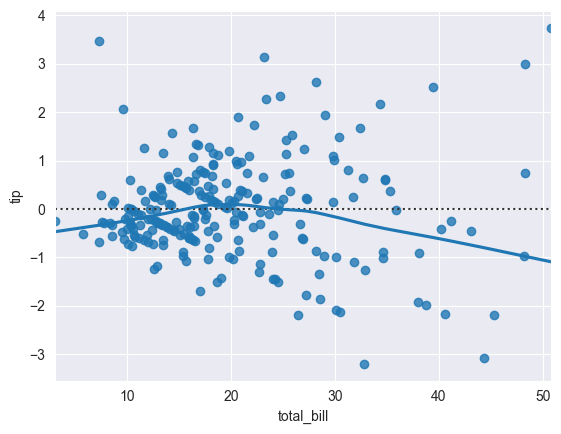

In [7]:
# 예제1-3
#회귀 모델 적합 및 부분 회귀 플롯(Partial Regression Plot) 확인하기
# 문제 설명
# tips 데이터셋에서 종속 변수를 tip으로 하고,
# 독립 변수로 total_bill과 size를 사용하여 간단한 선형 회귀 모델을 적합한다.
# statsmodels의 OLS 회귀를 사용한 뒤,
# 부분 회귀 플롯으로 total_bill이 tip에 미치는 순수한 영향력을 시각화해본다.

from statsmodels.formula.api import ols

Rformula = "tip ~ total_bill + size"

regression_result = ols(Rformula, data = tips).fit()

# 부분 회귀 플롯 그리기
sns.residplot(tips, x="total_bill", y="tip", lowess=True)